In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style("whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# <font color='#0C509E' style='font-size: 40px;'>Logistic Regression - V1</font>

## 1. Exploring the Data

This is a dummy dataset that pesents if customers have purchased a given product or not.<br/>

**Dataset:** https://www.kaggle.com/rakeshrau/social-network-ads

### 1.1. Importing the Dataset

In [5]:
df = pd.read_csv('./datasets/Social_Network_Ads.csv')

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### 1.2. Basic Information about the Dataset

In [7]:
print(f'This dataset has {df.shape[0]} observations/samples/rows and {df.shape[1]} attributes/features/colunas')

This dataset has 400 observations/samples/rows and 5 attributes/features/colunas


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


<br/>**"Purchased"** is a _dependent variable_ and the others are _independent variables_.

In [10]:
display(df['Purchased'].unique())

array([0, 1], dtype=int64)

**Two clases: Binary** Classification Problem.

In [11]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [12]:
df['Purchased'].value_counts()/df.shape[0]

Purchased
0    0.6425
1    0.3575
Name: count, dtype: float64

There is a **class imbalance**: _class 0_ represents 64.25% of the samples while _class 1_ has 35.75%. <br/>
This can _hinder_ the model training. <br/>
However, we will ignore this for now.

### 1.3. Correlation matrix

In [14]:
df[['Age', 'EstimatedSalary', 'Purchased']].corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


## 2. Training a Logistic Regression model with a _single_ feature

Let's start with a simpler version of our **binary classifier**, training a logistic regressor on _just_ **a single independent variable** (_feature_).

### 2.1. Extracting the independent and dependent variables

In [15]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### Feature matrix (X)

In [16]:
X = df[['Age']] 

In [17]:
X

,Age
0,19
1,35
2,26
3,27
4,19
...,...
395,46
396,51
397,50
398,36


#### Ground-truth Classes (y)

In [18]:
y = df[['Purchased']]

In [19]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


### 2.2. Splitting the dataset into Training Set and Test Set
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

**PS:** Use _stratified_ split.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### **Checking training and test set sizes**

In [22]:
X.shape, y.shape

((400, 1), (400, 1))

In [23]:
X_train.shape, y_train.shape

((320, 1), (320, 1))

In [24]:
X_test.shape, y_test.shape

((80, 1), (80, 1))

In [25]:
X_train.head()

,Age
3,27
18,46
202,39
250,44
274,57


In [26]:
X_test.head()

,Age
209,46
280,59
33,28
210,48
93,29


##### **Checking the class proportions**
Recall that, considering the whole data, _class 0_ has 64.25% of the samples while _class 1_ has 35.75%

In [27]:
# training set
y_train.value_counts()/ y_train.shape[0]

Purchased
0            0.640625
1            0.359375
Name: count, dtype: float64

In [28]:
# training set
y_test.value_counts()/ y_test.shape[0]

Purchased
0            0.65
1            0.35
Name: count, dtype: float64

### 2.3 Visualizing the training set

<Axes: xlabel='Age', ylabel='Purchased'>

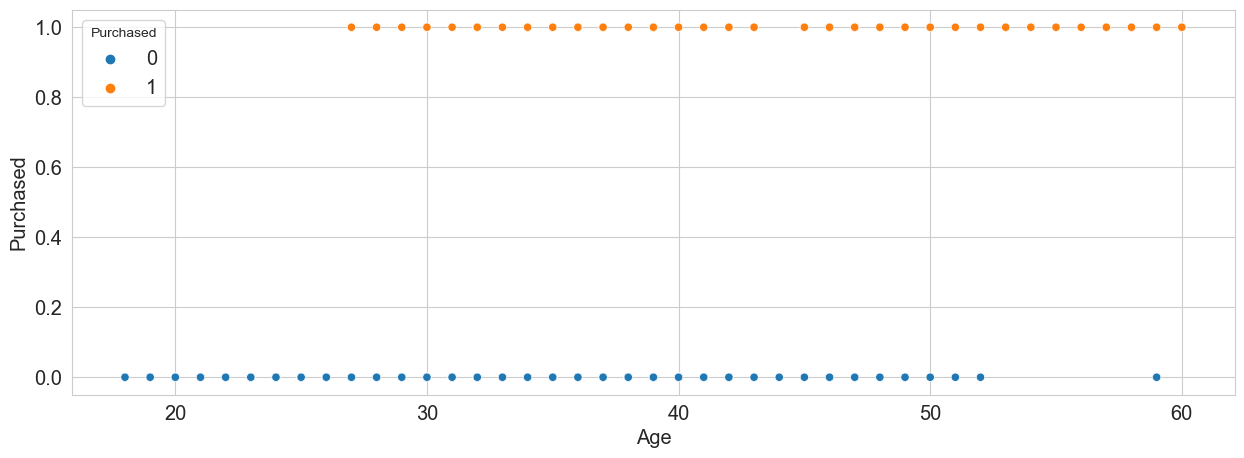

In [42]:
sns.scatterplot(x=X_train['Age'], y=y_train['Purchased'], hue=y_train['Purchased'])

### 2.4. Training a Logistic Regression Model
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [43]:
from sklearn.linear_model import LogisticRegression  

In [45]:
classifier = LogisticRegression(random_state=42)

In [53]:
classifier.fit(X_train, y_train['Purchased'])

LogisticRegression(random_state=42)

#### Model's Parameters

In [54]:
classifier.classes_

array([0, 1], dtype=int64)

In [55]:
classifier.intercept_

array([-7.32373534])

In [56]:
classifier.coef_

array([[0.17104582]])

Portanto, os parâmetros aprendidos para nosso **modelo de regressão logística**, a partir do conjunto de treinamento utilizado, foi:

$\theta^T = [\theta_0, \theta_1] = [-7.32, 0.17]$

<span style="font-size: 20pt">
$
h_\theta(x) = \frac{1}{1 + e^{-\theta^{T}*x}} = \frac{1}{1 + e^{-(-7.32 + 0.17 * x_1)}}
$
</span>

### 2.5. Visualizing the trained Model

#### **Trained Model (Sigmoid)**

In [57]:
x_sig = X_train['Age']
# prob. of the samples being classified as the positive class
y_sig = classifier.predict_proba(X_train)[:, 1]

#### **Decision boundary**

Using a _single feature_, the **decision boundary** is a _vertical line_:

<span style='font-size: 20pt'>
$\theta_0 + \theta_1 * x_1 = 0$

$x_1 = \frac{-\theta_0}{\theta_1}$
</span>

In [58]:
theta_0 = classifier.intercept_[0]
theta_1 = classifier.coef_[0, 0]

In [59]:
decision_boundary = -theta_0 / theta_1
decision_boundary

42.81738968528534

The found _decision boundary_ is:
    
$x_1 = 42.81738968528535$

#### **Putting it all together**

In [60]:
train_indices = X_train.index
train_indices

Index([  3,  18, 202, 250, 274,  63, 248, 301, 108,  90,
       ...
       214, 121, 399,  20, 188,  71, 106, 270, 348, 102],
      dtype='int64', length=320)

In [61]:
df_train = df.iloc[train_indices]
df_train

,User ID,Gender,Age,EstimatedSalary,Purchased
3,15603246,Female,27,57000,0
18,15704583,Male,46,28000,1
202,15735549,Female,39,134000,1
250,15810075,Female,44,39000,0
274,15692819,Female,57,26000,1
...,...,...,...,...,...
71,15726358,Female,24,27000,0
106,15706185,Female,26,35000,0
270,15680752,Female,43,133000,0
348,15579212,Male,39,77000,0


C:\Users\mfuini\.conda\envs\Aula1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mfuini\.conda\envs\Aula1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Logistic Regression - TRAIN')

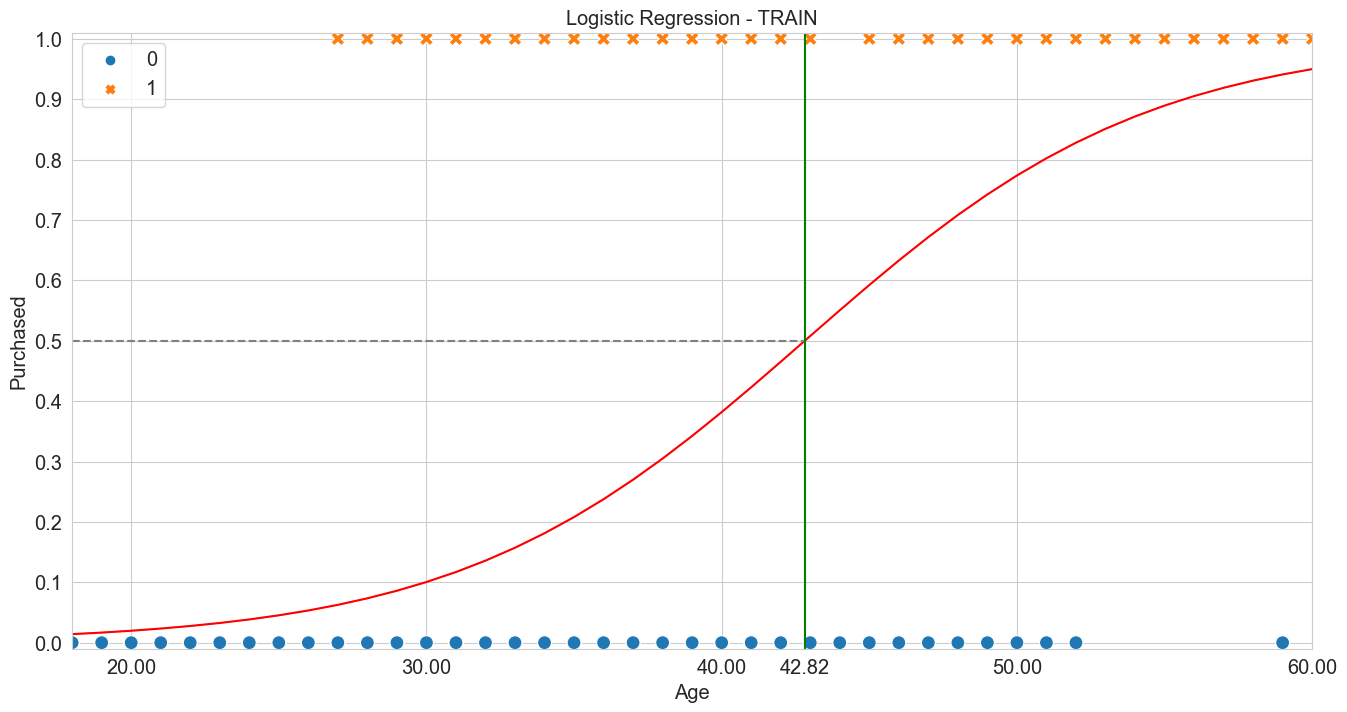

In [62]:
plt.figure(figsize=(16,8))

ax = sns.scatterplot(data=df_train, x='Age', y='Purchased', style='Purchased', hue='Purchased', s=100)
sns.lineplot(x=x_sig, y=y_sig, color='red', ax=ax)
plt.hlines(0.5, df_train['Age'].min(), decision_boundary, colors='gray', linestyles='--')
plt.axvline(decision_boundary, color='green')

x_ticks = np.append(ax.get_xticks(), decision_boundary)

ax.set_xticks(x_ticks)
plt.yticks(np.arange(0, 1.001, 0.1))
plt.xlim(df_train['Age'].min(), df_train['Age'].max())
plt.ylim(-0.01, 1.01)
plt.title('Logistic Regression - TRAIN')
# plt.legend(['learned model (sigmoid)', 'learned linear model', 'decision boundary'])

## 3. Classification / Prediction

In [63]:
X_test

,Age
209,46
280,59
33,28
210,48
93,29
...,...
246,35
227,56
369,54
176,35


In [64]:
y_test #Rótulo/true labels/true class/ground-truth

,Purchased
209,0
280,1
33,0
210,1
93,0
...,...
246,0
227,1
369,1
176,0


In [65]:
y_pred=classifier.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [66]:
y_pred_proba=classifier.predict_proba(X_test)
y_pred_proba.shape

(80, 2)

In [67]:
y_pred_proba

array([[0.36717109, 0.63282891],
       [0.05907988, 0.94092012],
       [0.92652205, 0.07347795],
       [0.29184011, 0.70815989],
       [0.91399398, 0.08600602],
       [0.89956141, 0.10043859],
       [0.32840277, 0.67159723],
       [0.91399398, 0.08600602],
       [0.61819707, 0.38180293],
       [0.53489595, 0.46510405],
       [0.79201787, 0.20798213],
       [0.14909803, 0.85090197],
       [0.9673805 , 0.0326195 ],
       [0.98021444, 0.01978556],
       [0.89956141, 0.10043859],
       [0.79201787, 0.20798213],
       [0.17212417, 0.82787583],
       [0.36717109, 0.63282891],
       [0.6576746 , 0.3423254 ],
       [0.09493362, 0.90506638],
       [0.97236713, 0.02763287],
       [0.91399398, 0.08600602],
       [0.32840277, 0.67159723],
       [0.05907988, 0.94092012],
       [0.98327304, 0.01672696],
       [0.19787939, 0.80212061],
       [0.53489595, 0.46510405],
       [0.7300823 , 0.2699177 ],
       [0.1106829 , 0.8893171 ],
       [0.98327304, 0.01672696],
       [0.

array([0.63282891, 0.94092012, 0.07347795, 0.70815989, 0.08600602,
       0.10043859, 0.67159723, 0.08600602, 0.38180293, 0.46510405,
       0.20798213, 0.85090197, 0.0326195 , 0.01978556, 0.10043859,
       0.20798213, 0.82787583, 0.63282891, 0.3423254 , 0.90506638,
       0.02763287, 0.08600602, 0.67159723, 0.94092012, 0.01672696,
       0.80212061, 0.46510405, 0.2699177 , 0.8893171 , 0.01672696,
       0.63282891, 0.01672696, 0.23756319, 0.07347795, 0.38180293,
       0.20798213, 0.2699177 , 0.30491643, 0.05332533, 0.01413437,
       0.70815989, 0.03847042, 0.01413437, 0.67159723, 0.01978556,
       0.55039841, 0.08600602, 0.11698308, 0.70815989, 0.18120903,
       0.04532164, 0.85090197, 0.30491643, 0.04532164, 0.2699177 ,
       0.06264969, 0.94974166, 0.05332533, 0.11698308, 0.11698308,
       0.42290559, 0.20798213, 0.82787583, 0.07347795, 0.07347795,
       0.06264969, 0.46510405, 0.67159723, 0.3423254 , 0.15719833,
       0.82787583, 0.01672696, 0.06264969, 0.0326195 , 0.67159

## 4. Evaluation Metrics
We will use just a few metrics for simplificity. A complete overview about evaluation metrics for classification will be seen in the future. 

### 4.1. Confusion Matrix

<img src='imgs/confusion_matrix.png' width=250px/>

In [70]:
from sklearn.metrics import confusion_matrix

In [74]:
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

In [75]:
conf_matrix_df = pd.DataFrame({
    'Pred Label – Negative': [tn, fn],
    'Pred Label – Positive': [fp, tp]
}, index=['True Label – Negative', 'True Label – Positive'])

conf_matrix_df

,Pred Label – Negative,Pred Label – Positive
True Label – Negative,50,2
True Label – Positive,5,23


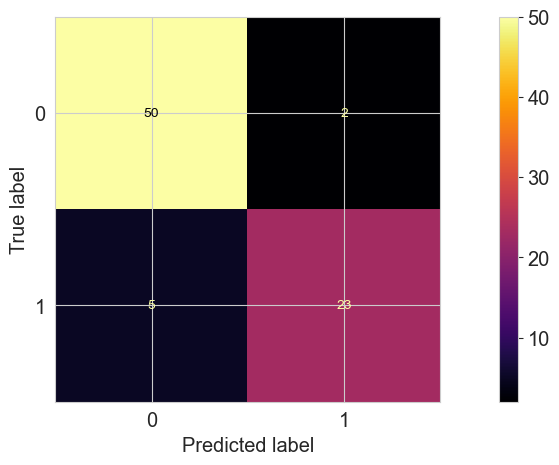

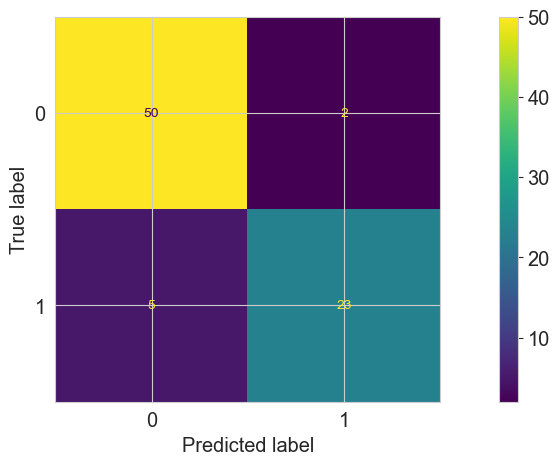

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(classifier,X_test, y_test, cmap='inferno')
disp.plot()


### 4.2. Precision

What is the **proportion** of **_true_ positives** among _all_ instances _classified_ (_correctly_ and _incorrectly_) as **_positives_**? <br/>
**How precise** is the **_positive_** classification?

_“From all patients classified as **cancer**, how many (**proportion**) actually had **cancer**?”_

<span style="font-size: 16pt">
$
precision = \frac{TP}{TP + FP}
$
</span>

In [85]:
precision = tp / (tp+fp)

In [86]:
print(f'Precision: {precision}')

Precision: 0.92


#### Alternatively
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html <br/>
By default, the label of the positive class is 1

In [87]:
from sklearn.metrics import precision_score
precision_sk = precision_score(y_test,y_pred)


0.92

In [88]:
print(f'Precision: {precision_sk}')

Precision: 0.92


### 4.3. Recall / Sensitivity / True Positive Rate
What is the **proportion** of ***positives*** that were _correctly classified_ as ***positives***?

_What is the **proportion** of patients with **cancer** that were **correctly identified**? <br/>
**How sensitive** is the classifier to **correctly identify** patients with **cancer**?_

<span style="font-size: 16pt">
$
recall = \frac{TP}{FN+TP}
$
</span>

In [89]:
recall = tp/(tp+fn)

In [90]:
print(f'Recall: {recall}')
#O modelo identificou 82% dos pacientes diabéticos como diabéticos.

Recall: 0.8214285714285714


#### Alternatively
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html <br/>
By default, the label of the positive class is 1

In [91]:
from sklearn.metrics import recall_score
recall_sk = recall_score(y_test,y_pred)

In [92]:
print(f'Recall: {recall_sk}')

Recall: 0.8214285714285714


### 4.4. Accuracy
What was the (overall) **classification hit rate**?

<span style="font-size: 16pt">
$
accuracy = \frac{TP + TN}{TN + FN + FP + TP}
$
</span>

In [93]:
accuracy = (tp+tn)/(tp+tn+fn+fp)

In [94]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.9125


#### Alternatively
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [95]:
from sklearn.metrics import accuracy_score
accuracy_sk = accuracy_score(y_test,y_pred)

In [96]:
print(f'Accuracy: {accuracy_sk}')

Accuracy: 0.9125


#### Problems:
Issue with **biased dataset (class imbalance)**: Easy to ***cheat** the score:
- Consider that _only_ 1% of the samples are ***positives***
- Guess everything as ***negative***
- Achieve 99% accuracy

**Solutions:** Balanced Accuracy or F1-Score

### 4.5. F1-Score
How **good** (_precision_) and **complete** (_sensitive_) are the _predictions_?

It is the _harmonic mean_ of the _precision_ and _recall_. <br/>
The **highest possible value** is **1.0**, indicating _perfect precision_ and recall_; <br/>
The **lowest possible value** is 0, if either the _precision_ or the _recall_ is **zero**.

<span style="font-size: 16pt">
$
F1 = 2 * \frac{precision \space * \space recall}{precision \space + \space recall}
$
</span>

In [97]:
f1 = 2* (precision*recall)/(precision+recall)

In [98]:
print(f'F1 Score: {f1}')

F1 Score: 0.8679245283018867


#### Alternatively
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [99]:
from sklearn.metrics import f1_score
f1_sk=f1_score(y_test,y_pred)

In [100]:
print(f'F1 Score: {f1_sk}')

F1 Score: 0.8679245283018867


### 4.6. Classification Report
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,digits=4, target_names=['Not purchased', 'Purchased']))

               precision    recall  f1-score   support

Not purchased     0.9091    0.9615    0.9346        52
    Purchased     0.9200    0.8214    0.8679        28

     accuracy                         0.9125        80
    macro avg     0.9145    0.8915    0.9013        80
 weighted avg     0.9129    0.9125    0.9113        80


## 5. Visualizing the Predictions

In [104]:
test_indices = X_test.index
test_indices

Index([209, 280,  33, 210,  93,  84, 329,  94, 266, 126,   9, 361,  56,  72,
       132,  42, 278, 376, 231, 385,  77,  15, 391, 271,   0, 396, 114, 225,
       262, 104, 395, 193, 261,  57, 232, 116, 113, 342, 158, 141, 381,  55,
        76,  25,  82, 382, 148, 181,  22, 173,  46, 321, 338,  70, 374,  39,
       223, 172,  30, 152, 124, 294, 255,  78, 101,  31, 352, 268, 394,  73,
       320, 140,   5,  45, 388, 246, 227, 369, 176, 289],
      dtype='int64')

In [105]:
df_test = df.iloc[test_indices]
df_test

,User ID,Gender,Age,EstimatedSalary,Purchased
209,15697424,Female,46,22000,0
280,15609669,Female,59,88000,1
33,15776733,Female,28,44000,0
210,15724536,Female,48,96000,1
93,15699284,Female,29,28000,0
...,...,...,...,...,...
246,15638003,Female,35,50000,0
227,15685346,Male,56,133000,1
369,15624755,Female,54,26000,1
176,15609653,Female,35,47000,0


C:\Users\mfuini\.conda\envs\Aula1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mfuini\.conda\envs\Aula1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Logistic Regression - TEST')

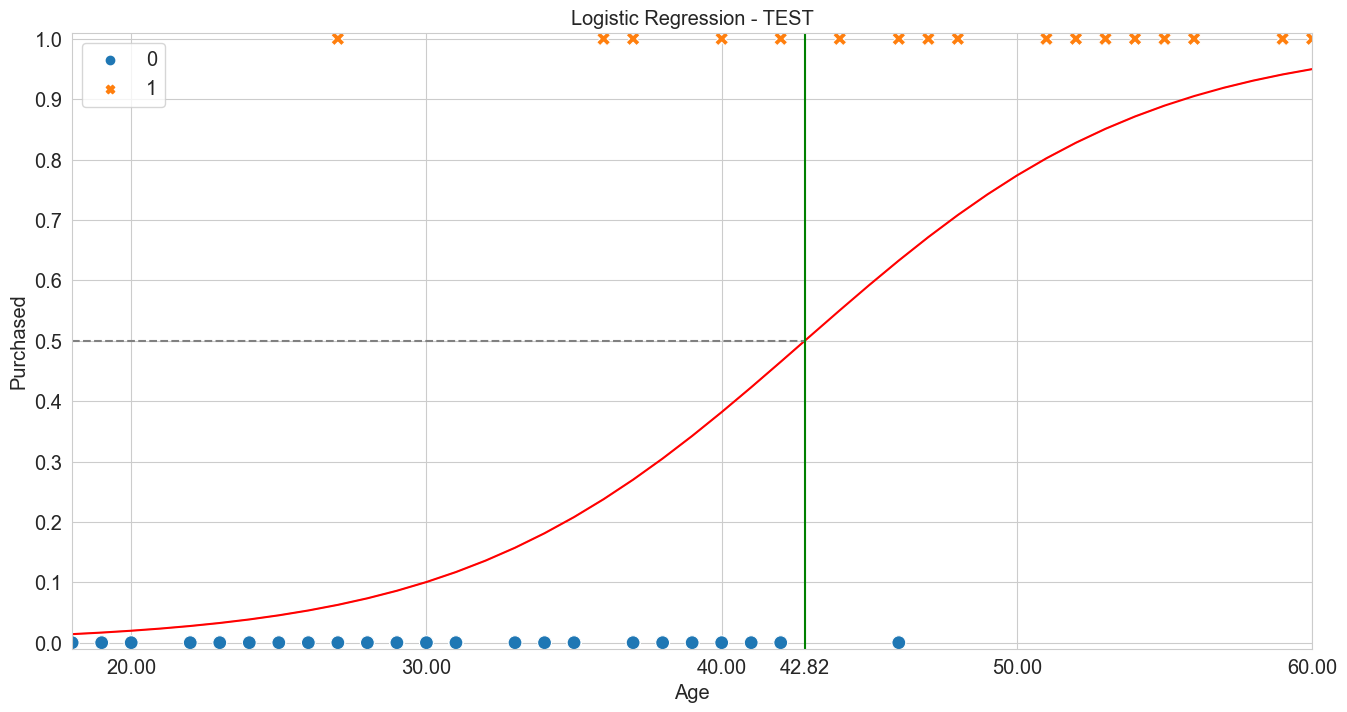

In [106]:
plt.figure(figsize=(16,8))

ax = sns.scatterplot(data=df_test, x='Age', y='Purchased', style='Purchased', hue='Purchased', s=100)
sns.lineplot(x=x_sig, y=y_sig, color='red', ax=ax)
plt.hlines(0.5, X_test['Age'].min(), decision_boundary, colors='gray', linestyles='--')
plt.axvline(decision_boundary, color='green')

x_ticks = np.append(ax.get_xticks(), decision_boundary)

ax.set_xticks(x_ticks)
plt.yticks(np.arange(0, 1.001, 0.1))
plt.xlim(df_test['Age'].min(), df_test['Age'].max())
plt.ylim(-0.01, 1.01)
plt.title('Logistic Regression - TEST')